* 구글 드라이브 내에서 실행하는 폴더 및 파일을 압축하여 메일에 함께 첨부했습니다.  
* EDA 및 모델 구현은 Colab 무료버전에서 실행했습니다.  
* 첨부한 압축파일을 압축해제하여, 구글 드라이브에 업로드 한 후, 실행할 수 있습니다.  




In [39]:
# 구글 드라이브에 저장된 파일을 사용하기 위한 코드
from google.colab import drive
drive.mount('/content/drive')

# 저장된 파일의 경로 설정
%cd /content/drive/MyDrive/agency_data/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/agency_data


# Import Library

In [ ]:
# !pip install graphviz
# !pip install statsmodels
# !pip install xgboost

In [ ]:
import pandas as pd
#행렬 연산 패키지
import numpy as np
#데이터 시각화 패키지
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

%matplotlib inline

#Scaler
from sklearn.preprocessing import StandardScaler
#data split
from sklearn.model_selection import train_test_split#graphviz: 나무 구조 시각화(.dot 확장자 파일 불러오기 등)
from sklearn.tree import export_graphviz
import graphviz

#주성분 분석
from sklearn.decomposition import PCA
import statsmodels.api as sm


#회귀 분석
from sklearn.linear_model import LinearRegression
#후진제거법
from sklearn.feature_selection import RFE

#예측
#예측/회귀 Decision tree
from sklearn.tree import DecisionTreeRegressor
#예측/회귀 Random Forest
from sklearn.ensemble import RandomForestRegressor
#예측/회귀 Gradient
from sklearn.ensemble import GradientBoostingRegressor
#최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
#ARIMA
from statsmodels.tsa.arima_model import ARIMA
#회귀분석
from statsmodels.formula.api import ols
#선형모델 formula(y ~ x1 + x2 + ...)
import statsmodels.formula.api as smf
#다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.api import qqplot, add_constant
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import r2_score#분류
#로지스틱 회귀
from statsmodels.api import Logit
#의사결정나무
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier, export_graphviz
#랜덤포레스트
from sklearn.ensemble import RandomForestClassifier
#그래디언트부스트
from sklearn.ensemble import GradientBoostingClassifier
#엑스지부스트
from xgboost import XGBClassifier
from xgboost import plot_importance
#SVM
from sklearn.svm import SVC
#분류 NN (MLP)
from sklearn.neural_network import MLPClassifier
#KNN 분류
from sklearn.neighbors import KNeighborsClassifier#분류모델 평가 함수
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, auc#사용할 함수 선언#RSME: root mean squared error 함수
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))#MAPE: mean absolutre percentage error 함수
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred)/ y_true))*100#XG Boost에서 사용할 정확도 표현 함수
def eval_class_model(y_test, y_pred):
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precesion = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    F1 = f1_score(y_test, y_pred)
    AUC = roc_auc_score(y_test, y_pred)
    print('오차행렬 \n',confusion, '\n')
    print('정확도: ', accuracy)
    print('정밀도: ', precesion)
    print('재현율: ', recall)
    print('F1: ', F1)
    print('AUC: ', AUC)

import warnings
warnings.filterwarnings('ignore')

In [ ]:
!apt-get update -qq         # apt-get 패키지 설치 명령어, -qq : 에러외 메세지 숨기기
!apt-get install fonts-nanum* -qq #나눔글꼴 설치

import matplotlib.font_manager as fm

fe = fm.FontEntry(fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', name='NanumGothic') #파일 저장되어있는 경로와 이름 설정
fm.fontManager.ttflist.insert(0, fe)  # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 10, 'font.family': 'NanumGothic'}) #폰트설정
mpl.rcParams['axes.unicode_minus'] = False

Selecting previously unselected package fonts-nanum.
(Reading database ... 121753 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-3_all.deb ...
Unpacking fonts-nanum-coding (2.5-3) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-7_all.deb ...
Unpacking fonts-nanum-eco (1.000-7) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20200506-1_all.deb ...
Unpacking fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Setting up fonts-nanum-coding (2.5-3) ...
Setting up fonts-nanum-eco (1.000-7) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


# 데이터 읽기

In [ ]:
df_raw = pd.read_csv("./tele_customer_final.csv")
df_raw = df_raw.drop(labels = 'Unnamed: 0',axis = 1)
df_raw.head()

,CustomerId,Gender,Age,AgeGroup,Married,Dependents,noDependents,Referrals,noReferrals,PaperlessBilling,...,ChurnReason,CustomerLTV,SatisScore,TotalExtraDataCharge,AvgRoamCharge,TotalRoamCharge,Tenure_month,Sum_charge,Monthly_charge,ReasonCategory
0,C-10001,여성,37,30대,Yes,No,0,Yes,2,Yes,...,NaN,2205,3,0,47910,431100,21.0,1755400.0,83590.0,NaN
1,C-10002,남성,46,40대,No,No,0,No,0,No,...,NaN,5414,5,11300,12090,108710,21.0,1447500.0,68929.0,NaN
2,C-10003,남성,50,50대,No,No,0,No,0,Yes,...,Price too high,4479,1,0,38080,152100,5.0,490900.0,98180.0,Price
3,C-10004,남성,78,70대,Yes,No,0,Yes,1,Yes,...,Product dissatisfaction,3714,1,0,31410,408720,14.0,1578400.0,112743.0,PS
4,C-10005,여성,75,70대,Yes,No,0,Yes,3,Yes,...,Network reliability,3464,1,0,8360,24970,4.0,378000.0,94500.0,PS


# 새롭게 산출된 Data

In [ ]:
df_raw_ch = df_raw[['CustomerId','Age','Dependents','noReferrals','PaymentMethod','OnlineSecurity',
                    'OnlineBackup','TechSupport','UnlimitedData','AvgDownloadGB','ChurnLabel',
                    'CustomerLTV','Monthly_charge','AvgRoamCharge']]
df_raw_ch['ChurnLabel'] = df_raw['ChurnLabel'].replace({'Yes': 1, 'No': 0})

## SatisScore는 상관관계가 0.7 이상이라 제외함.
## 추천시스템을 위한 데이터 생성에 필요한 데이터라 df_raw_ch를 미리 만들어둠
df_raw_choose = df_raw_ch.drop(['CustomerId'],axis=1)
df = df_raw_choose.copy()
df_raw_choose.head()

,Age,Dependents,noReferrals,PaymentMethod,OnlineSecurity,OnlineBackup,TechSupport,UnlimitedData,AvgDownloadGB,ChurnLabel,CustomerLTV,Monthly_charge,AvgRoamCharge
0,37,No,2,신용카드,No,Yes,Yes,Yes,16,0,2205,83590.0,47910
1,46,No,0,신용카드,No,No,No,No,10,0,5414,68929.0,12090
2,50,No,0,계좌이체,No,No,No,Yes,30,1,4479,98180.0,38080
3,78,No,1,계좌이체,No,Yes,No,Yes,4,1,3714,112743.0,31410
4,75,No,3,신용카드,No,No,Yes,Yes,11,1,3464,94500.0,8360


In [ ]:
#get dummy
df_raw_choose_dummy = pd.get_dummies(df_raw_choose)
df_raw_choose_dummy.head()

,Age,noReferrals,AvgDownloadGB,ChurnLabel,CustomerLTV,Monthly_charge,AvgRoamCharge,Dependents_No,Dependents_Yes,PaymentMethod_계좌이체,PaymentMethod_신용카드,PaymentMethod_이체/메일확인,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,TechSupport_No,TechSupport_Yes,UnlimitedData_No,UnlimitedData_Yes
0,37,2,16,0,2205,83590.0,47910,True,False,False,True,False,True,False,False,True,False,True,False,True
1,46,0,10,0,5414,68929.0,12090,True,False,False,True,False,True,False,True,False,True,False,True,False
2,50,0,30,1,4479,98180.0,38080,True,False,True,False,False,True,False,True,False,True,False,False,True
3,78,1,4,1,3714,112743.0,31410,True,False,True,False,False,True,False,False,True,True,False,False,True
4,75,3,11,1,3464,94500.0,8360,True,False,False,True,False,True,False,True,False,False,True,False,True


In [ ]:
df_train, df_test = train_test_split(df_raw_choose_dummy, test_size = 0.2, random_state = 42)
x = df_train.drop(["ChurnLabel"], axis = 1, inplace = False) #목표변수 외
y = df_train["ChurnLabel"] #목표변수
test = df_test.copy()
test = test.drop(['ChurnLabel'],axis=1)

#더미화한 변수를 train set과 test(valid) set으로 분리한다
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(x, y, test_size = 0.3, random_state = 42)

print("분할 전 설명변수 데이터 :", x.shape)
print("분할 후 설명변수 데이터 :", df_train_x.shape, "\n valid", df_test_x.shape)
print("test 데이터 :", test.shape)
print('*'*40)
print("분할 전 목표변수 데이터 :", y.shape)
print("분할 후 목표변수 데이터 :", df_train_y.shape, "\n valid", df_test_y.shape)

# 선형회귀 돌리고 나온 데이터

분할 전 설명변수 데이터 : (5490, 19)
분할 후 설명변수 데이터 : (3843, 19) 
 valid (1647, 19)
test 데이터 : (1373, 19)
****************************************
분할 전 목표변수 데이터 : (5490,)
분할 후 목표변수 데이터 : (3843,) 
 valid (1647,)


# XGBoost

In [ ]:
#모델 생성
#그래디언트 부스팅 모델 생성
xg_uncustomized = XGBClassifier(random_state = 42)
xg_uncustomized.fit(df_train_x, df_train_y)
print('Accuracy on training set:', xg_uncustomized.score(df_train_x,df_train_y))
print('Accuracy on test set:', xg_uncustomized.score(df_test_x,df_test_y))

Accuracy on training set: 0.9960967993754879
Accuracy on test set: 0.7899210686095932


In [ ]:
#x별 정확도 그래프로 확인
def show_plot(para,x):
    plt.figure(figsize=(6,4))
    plt.plot(para, train_accuracy, linestyle = "-", label = 'Train Accuracy')
    plt.plot(para, test_accuracy, linestyle = "--", label = 'Test Accuracy')
    plt.ylabel('accuracy')
    plt.xlabel(x) ; plt.legend() ; plt.show()

    LearningRate  TrainAccuracy  TestAccuracy
0           0.01          0.782         0.784
1           0.02          0.829         0.805
2           0.03          0.844         0.808
3           0.04          0.854         0.803
4           0.05          0.865         0.805
5           0.06          0.882         0.806
6           0.07          0.886         0.800
7           0.08          0.905         0.798
8           0.09          0.912         0.797
9           0.10          0.920         0.790
10          0.11          0.927         0.793
11          0.12          0.933         0.795
12          0.13          0.945         0.786
13          0.14          0.953         0.798
14          0.15          0.954         0.787
15          0.16          0.963         0.791
16          0.17          0.966         0.789
17          0.18          0.969         0.786
18          0.19          0.975         0.786


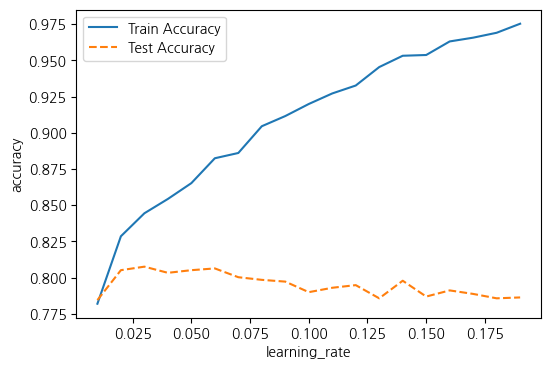

None


In [ ]:
#학습률 조정
#train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
#learning_rate 학습률 변경
para_lr = [lr * 0.01 for lr in range(1,20)]

for v_learning_rate in para_lr:
    xg = XGBClassifier(learning_rate = v_learning_rate, random_state = 42)
    xg.fit(df_train_x, df_train_y)
    train_accuracy.append(xg.score(df_train_x,df_train_y))
    test_accuracy.append(xg.score(df_test_x, df_test_y))

#데이터 테이블로 저장
df_accuracy_lr = pd.DataFrame()
df_accuracy_lr['LearningRate'] = para_lr
df_accuracy_lr['TrainAccuracy'] = train_accuracy
df_accuracy_lr['TestAccuracy'] = test_accuracy
#LearningRate 별 정확도 테이블
print(df_accuracy_lr.round(3))
print(show_plot(para_lr,'learning_rate'))

In [ ]:
learning_rate = 0.07

    Estimators  TrainAccuracy  TestAccuracy
0            2          0.753         0.760
1            4          0.753         0.760
2            6          0.753         0.760
3            8          0.753         0.760
4           10          0.768         0.776
5           12          0.778         0.784
6           14          0.782         0.783
7           16          0.789         0.787
8           18          0.797         0.791
9           20          0.812         0.798
10          22          0.817         0.802
11          24          0.819         0.801
12          26          0.823         0.802
13          28          0.826         0.806
14          30          0.830         0.808
15          32          0.831         0.808
16          34          0.834         0.807
17          36          0.836         0.811
18          38          0.838         0.810
19          40          0.837         0.809
20          42          0.839         0.809
21          44          0.842   

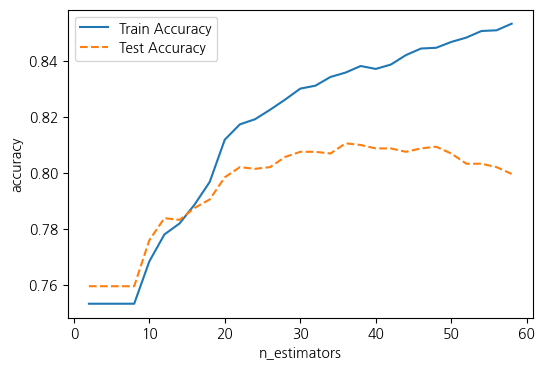

None


In [ ]:
#트리 수 조정
train_accuracy = [] ; test_accuracy = []
para_n_tree = [n_tree*2 for n_tree in range(1,30)]

for v_n_estimators in para_n_tree:
    xg = XGBClassifier(n_estimators = v_n_estimators,learning_rate = learning_rate,
                       random_state = 42)
    xg.fit(df_train_x, df_train_y)
    train_accuracy.append(xg.score(df_train_x,df_train_y))
    test_accuracy.append(xg.score(df_test_x, df_test_y))

df_accuracy_n = pd.DataFrame()
df_accuracy_n['Estimators'] = para_n_tree
df_accuracy_n['TrainAccuracy'] = train_accuracy
df_accuracy_n['TestAccuracy'] = test_accuracy
# n_estimators 정확도 테이블
print(df_accuracy_n.round(3))
print(show_plot(para_n_tree,'n_estimators'))

In [ ]:
#트리 수 지정
n_estimators = 32

    Depth  TrainAccuracy  TestAccuracy
0       1          0.753         0.760
1       2          0.753         0.760
2       3          0.798         0.800
3       4          0.811         0.803
4       5          0.820         0.804
5       6          0.831         0.808
6       7          0.851         0.806
7       8          0.879         0.803
8       9          0.891         0.794
9      10          0.922         0.796
10     11          0.934         0.798
11     12          0.949         0.792
12     13          0.957         0.799
13     14          0.967         0.797
14     15          0.967         0.791
15     16          0.970         0.792
16     17          0.973         0.799
17     18          0.973         0.797
18     19          0.973         0.792
19     20          0.972         0.791


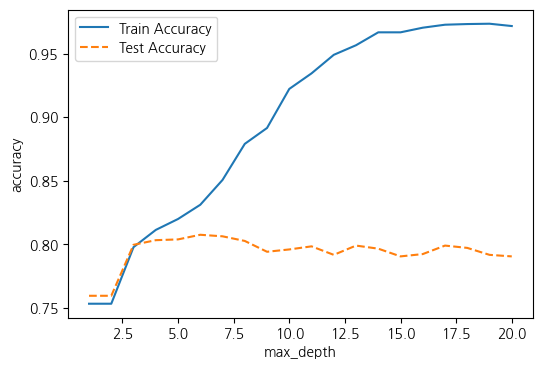

None


In [ ]:
#train 및 test 정확도 결과 저장용
train_accuracy = [] ; test_accuracy = []
#max_depth: 최대 깊이 변경 1~10
para_depth = [depth for depth in range(1,21)]

for v_max_depth in para_depth:
    xg = XGBClassifier(max_depth = v_max_depth, n_estimators = n_estimators,
                       learning_rate = learning_rate, random_state = 42)
    xg.fit(df_train_x, df_train_y)
    train_accuracy.append(xg.score(df_train_x,df_train_y))
    test_accuracy.append(xg.score(df_test_x, df_test_y))

#데이터 테이블로 저장
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth['Depth'] = para_depth
df_accuracy_depth['TrainAccuracy'] = train_accuracy
df_accuracy_depth['TestAccuracy'] = test_accuracy
#max_depth별 정확도 테이블
print(df_accuracy_depth.round(3))
print(show_plot(para_depth,'max_depth'))

In [ ]:
max_depth = 5

In [ ]:
xg_final = XGBClassifier(max_depth = max_depth,n_estimators = n_estimators,
                         learning_rate = learning_rate, random_state = 42)
xg_final.fit(df_train_x, df_train_y)
y_pred = xg_final.predict(df_test_x)
y_pred1 = xg_final.predict(test)
print('train set 정확성:', xg_final.score(df_train_x, df_train_y))
print('valid set 정확성:', xg_final.score(df_test_x, df_test_y))
print('test set 정확성:', xg_final.score(test, df_test['ChurnLabel']))

# print('Confusion Matrix:\n', confusion_matrix(df_test_y, y_pred))
print('Confusion Matrix:\n', confusion_matrix(df_test['ChurnLabel'], y_pred1))

train set 정확성: 0.8199323445225084
valid set 정확성: 0.803885853066181
test set 정확성: 0.8091769847050255
Confusion Matrix:
 [[957  58]
 [204 154]]


In [ ]:
from sklearn.model_selection import KFold, cross_val_score

xg = XGBClassifier(max_depth = max_depth,n_estimators = n_estimators,
                   learning_rate = learning_rate, random_state = 42)

for i in range(5,11):
    kfold = KFold(n_splits=i*2, shuffle=True, random_state=42)
    scores = cross_val_score(xg, x, y, cv=kfold)
    print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.80 (+/- 0.03)
Accuracy: 0.80 (+/- 0.04)
Accuracy: 0.81 (+/- 0.04)
Accuracy: 0.80 (+/- 0.03)
Accuracy: 0.81 (+/- 0.05)
Accuracy: 0.81 (+/- 0.05)


# 이탈하지 않는 고객 중 이탈할 고객 예측하기

In [ ]:
df_raw_chosen = df_raw_choose[df_raw_choose['ChurnLabel'] == 0]
df_raw_chosen_dummy = pd.get_dummies(df_raw_chosen)

df_raw_chosen_sa = df_raw_ch[df_raw_ch['ChurnLabel'] == 0]

In [ ]:
df_raw_chosen_x = df_raw_chosen_dummy.drop(["ChurnLabel"], axis = 1, inplace = False) #목표변수 외
df_raw_chosen_y = df_raw_chosen_dummy["ChurnLabel"] #목표변수

## 이탈 여부를 확인을 위한 y_predict

In [ ]:
#최종 모델을 이용하여 이탈하지 않는 고객 중 이탈할 고객 예측하기
y_predict = xg_final.predict(df_raw_chosen_x)

In [ ]:
print('정확성:', xg_final.score(df_raw_chosen_x, df_raw_chosen_y))
print('Confusion Matrix:\n', confusion_matrix(df_raw_chosen_y, y_predict))

정확성: 0.943034295679132
Confusion Matrix:
 [[4867  294]
 [   0    0]]


In [ ]:
v_feature_name = df_train_x.columns
# 변수중요도
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = xg_final.feature_importances_

df_importance.sort_values("Importance", ascending=False, inplace =True)
df_importance.round(3)

,Feature,Importance
11,OnlineSecurity_No,0.208
1,noReferrals,0.183
15,TechSupport_No,0.114
2,AvgDownloadGB,0.104
9,PaymentMethod_신용카드,0.078
6,Dependents_No,0.076
13,OnlineBackup_No,0.050
4,Monthly_charge,0.045
8,PaymentMethod_계좌이체,0.039
17,UnlimitedData_No,0.029


Text(0, 0.5, '변수')

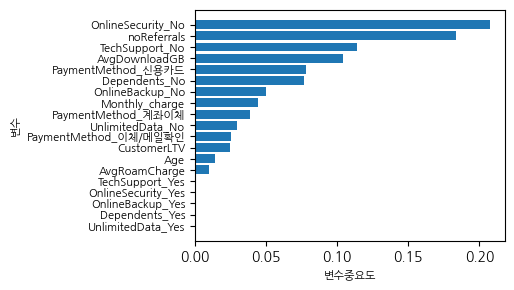

In [ ]:
df_imp=df_importance
df_imp.sort_values('Importance', ascending=True, inplace=True)
coordinates = range(len(df_imp))
plt.figure(figsize=(4,3))
plt.barh(y=coordinates, width=df_imp['Importance'])
plt.yticks(coordinates,df_imp['Feature'],fontsize=8)
plt.xlabel('변수중요도',fontsize=8)
plt.ylabel('변수',fontsize=8)

`Y_predict = 1`일 때, 이탈

In [ ]:
#df_raw_chosen dataFrame에 Y_predict열 추가
df_raw_chosen_sa['Y_predict'] = np.NaN

for i in range(len(df_raw_chosen_sa)):
    df_raw_chosen_sa['Y_predict'][i] = y_predict[i]

In [ ]:
df_raw_chosen_sa['Y_predict'].value_counts()

Y_predict
0.0    3644
1.0     222
Name: count, dtype: int64

이탈 위험군 고객은 222명이다.

In [ ]:
#이탈할 고객 df_raw_chosen_danger 로 저장
df_raw_chosen_danger = df_raw_chosen_sa[df_raw_chosen_sa['Y_predict']==1]
df_raw_chosen_danger

,CustomerId,Age,Dependents,noReferrals,PaymentMethod,OnlineSecurity,OnlineBackup,TechSupport,UnlimitedData,AvgDownloadGB,ChurnLabel,CustomerLTV,Monthly_charge,AvgRoamCharge,Y_predict
9,C-10010,43,Yes,3,신용카드,Yes,Yes,Yes,Yes,14,0,5509,106314.0,32210,1.0
14,C-10015,39,No,0,계좌이체,Yes,Yes,Yes,Yes,19,0,5795,52866.0,0,1.0
43,C-10045,57,Yes,0,신용카드,Yes,Yes,Yes,Yes,21,0,3290,52149.0,0,1.0
67,C-10070,39,No,0,계좌이체,No,Yes,No,Yes,12,0,4800,125896.0,56160,1.0
93,C-10097,51,No,0,계좌이체,No,No,No,No,0,0,2511,23156.0,11980,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5057,C-15197,47,No,0,계좌이체,Yes,No,No,Yes,14,0,2908,67808.0,47230,1.0
5064,C-15204,38,Yes,0,신용카드,No,No,No,No,0,0,3114,24086.0,19100,1.0
5082,C-15223,67,No,0,계좌이체,No,Yes,No,Yes,7,0,4615,79832.0,8810,1.0
5134,C-15275,49,No,0,계좌이체,No,No,No,No,19,0,3154,104138.0,6670,1.0


In [61]:
df_raw_chosen_danger.to_csv('df_high_danger_final1.csv', index=False)

# 이탈 위험군 대상 이탈 영향 인자 분석

## SHAP 모델

df_raw_chosen_danger을 대상으로 이탈에 많은 영향을 미치는 인자를 찾는다.

In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 5.9 MB/s eta 0:00:00


In [ ]:
df_raw_chosen_danger.columns

Index(['CustomerId', 'Age', 'Dependents', 'noReferrals', 'PaymentMethod',
       'OnlineSecurity', 'OnlineBackup', 'TechSupport', 'UnlimitedData',
       'AvgDownloadGB', 'ChurnLabel', 'CustomerLTV', 'Monthly_charge',
       'AvgRoamCharge', 'Y_predict'],
      dtype='object')

In [ ]:
data = df_raw_chosen_danger

# X값과 y값으로 데이터 분리
X = data[['Age', 'Dependents', 'noReferrals', 'PaymentMethod','OnlineSecurity', 'OnlineBackup', 'TechSupport', 'UnlimitedData',
          'AvgDownloadGB', 'CustomerLTV', 'Monthly_charge','AvgRoamCharge']]
data['ChurnLabel'] = data['ChurnLabel'].replace({'Yes': 1, 'No': 0})
y = data['ChurnLabel']

#get dummy
X_dummy = pd.get_dummies(X)

In [ ]:
import shap

# SHAP 값을 사용하여 각 특성이 모델 예측에 미치는 영향 분석
explainer = shap.TreeExplainer(xg_final)
shap_values = explainer.shap_values(X_dummy)

In [ ]:
# JS 시각화 라이브러리 로드
shap.initjs()

shap.force_plot(explainer.expected_value, shap_values[107,:], X_dummy.iloc[107,:])

In [ ]:
# JS 시각화 라이브러리 로드
shap.initjs()

shap.force_plot(explainer.expected_value, shap_values[97,:], X_dummy.iloc[97,:])

In [ ]:
# 전체 검증 데이터 셋에 대해서 적용
shap.initjs()

shap.force_plot(explainer.expected_value, shap_values, X_dummy)

#### 그래프 설명  
해당 변수가 빨간색을 띄면 target에 대해 양의 영향력이 존재하는 것이고,
파란색을 띄면 음의 영향력이 존재하는 것이다.

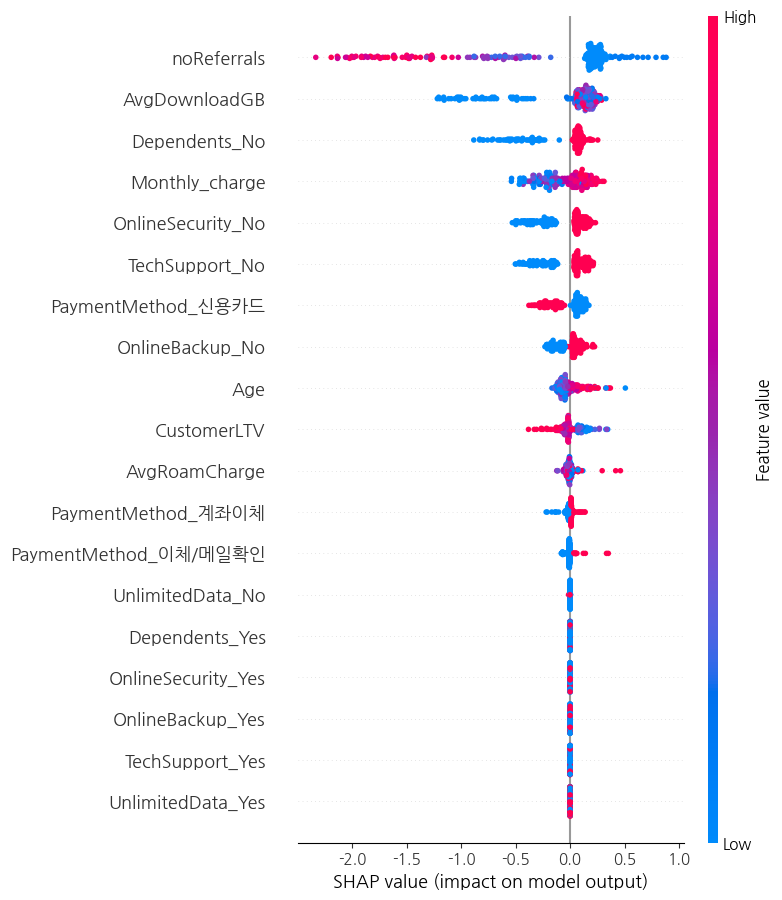

In [ ]:
# summary
shap.summary_plot(shap_values, X_dummy)

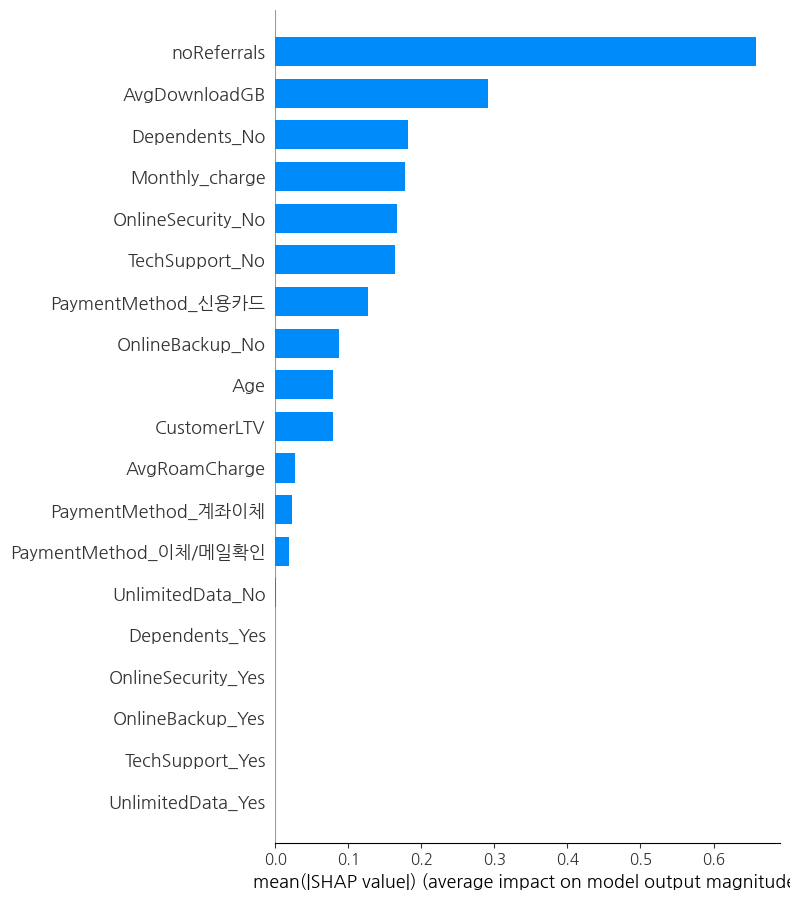

In [ ]:
 # 각 변수에 대한 |Shap Values|을 통해 변수 importance 파악
shap.summary_plot(shap_values, X_dummy, plot_type = "bar")

In [ ]:
# SHAP 값이 가장 높은 특성 확인
feature_idx = shap_values.mean(axis=0).argsort()[::-1][0]
feature_idx

3

핵심인자로 Monthly Charge(월 요금), noReferrals(추천 수), Dependents_No(부양자 없음), 보안/백업/기술지원 등 각종 부가서비스 혜택을 선정.

# Chrunlabel, noReferrals 관련성 가설검정

귀무가설 : ChurnLabel과 noReferrals 관련성이 없다. <br>
대립가설 : ChurnLabel과 noReferrals 관련성이 있다.

In [41]:
import scipy.stats as stats

result = pd.crosstab(df_raw.ChurnLabel, df_raw.noReferrals)
result

noReferrals,0,1,2,3,4,5,6,7,8,9,10,11
ChurnLabel,,,,,,,,,,,,
No,2574,577,208,222,217,240,212,242,210,234,223,2
Yes,1108,481,26,31,16,21,7,6,2,4,0,0


In [42]:
stats.chi2_contingency(observed = result)

Chi2ContingencyResult(statistic=750.3795454207457, pvalue=8.465468196547445e-154, dof=11, expected_freq=array([[2.76887688e+03, 7.95619700e+02, 1.75968818e+02, 1.90256885e+02,
        1.75216815e+02, 1.96272913e+02, 1.64688766e+02, 1.86496867e+02,
        1.59424741e+02, 1.78976832e+02, 1.67696780e+02, 1.50400699e+00],
       [9.13123124e+02, 2.62380300e+02, 5.80311817e+01, 6.27431153e+01,
        5.77831852e+01, 6.47270873e+01, 5.43112342e+01, 6.15031327e+01,
        5.25752586e+01, 5.90231677e+01, 5.53032202e+01, 4.95993006e-01]]))

p-value 값이 0.000이므로 유의수준 0.05에서 ChurnLabel과 noReferrals 통계적으로 유의한 관련성이 있는 것으로 나타났다.
<br> 그러므로 귀무가설을 기각하고 대립가설을 채택한다

# Chrunlabel, Dependents 관련성 가설검정

귀무가설 : ChurnLabel과 Dependents간에는 관련성이 없다.<br>
대립가설 : ChurnLabel과 Dependents간에는 관련성이 있다.

In [43]:
result = pd.crosstab(df_raw.ChurnLabel, df_raw.Dependents)
result

Dependents,No,Yes
ChurnLabel,,
No,3799,1362
Yes,1611,91


In [44]:
stats.chi2_contingency(observed = result)

Chi2ContingencyResult(statistic=338.35296206251377, pvalue=1.457366170953964e-75, dof=1, expected_freq=array([[4068.33891884, 1092.66108116],
       [1341.66108116,  360.33891884]]))

p-value 값이 0.000이므로 유의수준 0.05에서 ChurnLabel과 Dependents간에는 통계적으로 유의한 관련성이 있는 것으로 나타났다. <br>
그러므로 귀무가설을 기각하고 대립가설을 채택한다

# 부가 서비스 혜택 중 이탈 예방에 가장 효과가 클 서비스 찾기

In [62]:
df_raw = pd.read_csv("./df_high_danger_final1.csv")
aa = df_raw[['CustomerId','OnlineSecurity','OnlineBackup','TechSupport','UnlimitedData']]

aa['OnlineSecurity']= df_raw['OnlineSecurity'].map({'Yes':1,'No':0})
aa['OnlineBackup']= df_raw['OnlineBackup'].map({'Yes':1,'No':0})
aa['TechSupport']= df_raw['TechSupport'].map({'Yes':1,'No':0})
aa['UnlimitedData']= df_raw['UnlimitedData'].map({'Yes':1,'No':0})

aa = aa.reset_index()
aa.drop('index',axis=1,inplace=True)
aa

,CustomerId,OnlineSecurity,OnlineBackup,TechSupport,UnlimitedData
0,C-10010,1,1,1,1
1,C-10015,1,1,1,1
2,C-10045,1,1,1,1
3,C-10070,0,1,0,1
4,C-10097,0,0,0,0
...,...,...,...,...,...
217,C-15197,1,0,0,1
218,C-15204,0,0,0,0
219,C-15223,0,1,0,1
220,C-15275,0,0,0,0


In [63]:
users = []
services = []

for i in range(len(df_raw)):
    n=[]
    data = df_raw.loc[i]
    idd = data['CustomerId']
    id = int(idd[-5:])
    users.append(id)
    if data['OnlineBackup'] == 'Yes':
        n.append('OnlineBackup')
    if data['TechSupport'] == 'Yes':
        n.append('TechSupport')
    if data['OnlineSecurity'] == 'Yes':
        n.append('OnlineSecurity')
    if data['UnlimitedData'] == 'Yes':
        n.append('UnlimitedData')
    services.append(n)

asso = pd.DataFrame()
asso['user_id'] = users
asso['service_code'] = services
asso

,user_id,service_code
0,10010,"[OnlineBackup, TechSupport, OnlineSecurity, Un..."
1,10015,"[OnlineBackup, TechSupport, OnlineSecurity, Un..."
2,10045,"[OnlineBackup, TechSupport, OnlineSecurity, Un..."
3,10070,"[OnlineBackup, UnlimitedData]"
4,10097,[]
...,...,...
217,15197,"[OnlineSecurity, UnlimitedData]"
218,15204,[]
219,15223,"[OnlineBackup, UnlimitedData]"
220,15275,[]


In [64]:
service_id = []

for i in range(len(asso)):
    data = asso.loc[i]
    a=''
    for j in data['service_code']:
        a += str(j)+','
    service_id.append(a)

asso['service_id']=service_id
asso

,user_id,service_code,service_id
0,10010,"[OnlineBackup, TechSupport, OnlineSecurity, Un...","OnlineBackup,TechSupport,OnlineSecurity,Unlimi..."
1,10015,"[OnlineBackup, TechSupport, OnlineSecurity, Un...","OnlineBackup,TechSupport,OnlineSecurity,Unlimi..."
2,10045,"[OnlineBackup, TechSupport, OnlineSecurity, Un...","OnlineBackup,TechSupport,OnlineSecurity,Unlimi..."
3,10070,"[OnlineBackup, UnlimitedData]","OnlineBackup,UnlimitedData,"
4,10097,[],
...,...,...,...
217,15197,"[OnlineSecurity, UnlimitedData]","OnlineSecurity,UnlimitedData,"
218,15204,[],
219,15223,"[OnlineBackup, UnlimitedData]","OnlineBackup,UnlimitedData,"
220,15275,[],


In [65]:
asso['service_code'].value_counts()

service_code
[]                                                            49
[UnlimitedData]                                               32
[OnlineBackup, UnlimitedData]                                 24
[OnlineBackup, TechSupport, OnlineSecurity, UnlimitedData]    22
[OnlineSecurity, UnlimitedData]                               18
[TechSupport, UnlimitedData]                                  17
[OnlineBackup, OnlineSecurity, UnlimitedData]                 16
[OnlineBackup, TechSupport, UnlimitedData]                    15
[TechSupport, OnlineSecurity, UnlimitedData]                  14
[OnlineBackup, TechSupport, OnlineSecurity]                    5
[OnlineBackup]                                                 3
[OnlineBackup, OnlineSecurity]                                 2
[TechSupport, OnlineSecurity]                                  2
[OnlineSecurity]                                               1
[OnlineBackup, TechSupport]                                    1
[TechSupport

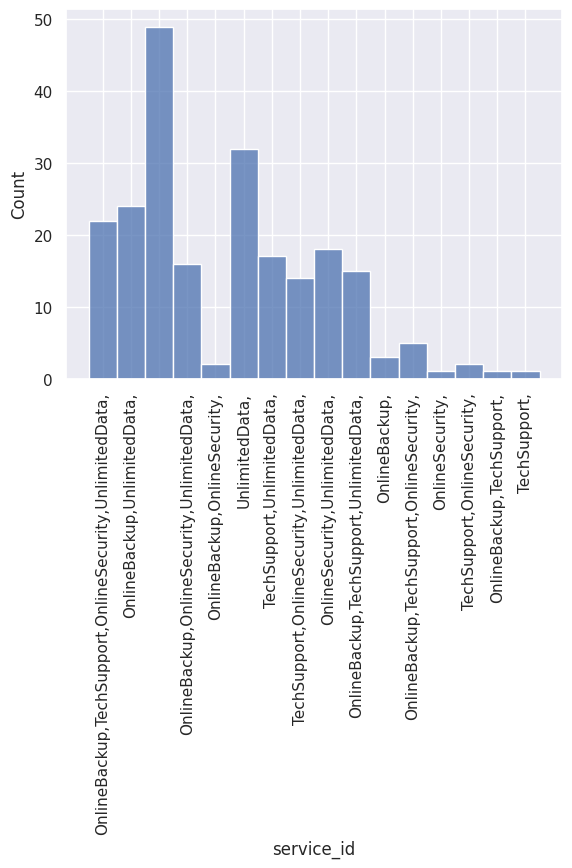

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

# plt.figure(figsize=(10,5))
sns.histplot(x=asso['service_id'],cumulative=False)
plt.xticks(rotation=90)
sns.set(font_scale=1)
plt.show()

*   미가입 고객과 unlimited data 서비스 가입 고객의 이탈이 가장 많음.
*   TechSupport만 가입한 고객의 이탈이 가장 적다.

따라서, unlimited data에 가입을 해지했을 때 고객 이탈의 감소율을 살핀다.

In [68]:
df_raw['UnlimitedData']= df_raw['UnlimitedData'].map({'Yes':'No','No':'No'})
df_raw['UnlimitedData'].value_counts()

UnlimitedData
No    222
Name: count, dtype: int64

# 구축한 :XGB를 재활용하여 이탈 위험군 222명 재예측

In [69]:
df_ttest = df_raw
df_ttest['ChurnLabel'] = df_ttest['ChurnLabel'].replace({'Yes': 1, 'No': 0})
df_ttest.drop(['Y_predict'],axis=1,inplace=True)
df_ttest1 = df_ttest.copy()
df_ttest.drop(['CustomerId'],axis=1,inplace=True)
df_ttest

,Age,Dependents,noReferrals,PaymentMethod,OnlineSecurity,OnlineBackup,TechSupport,UnlimitedData,AvgDownloadGB,ChurnLabel,CustomerLTV,Monthly_charge,AvgRoamCharge
0,43,Yes,3,신용카드,Yes,Yes,Yes,No,14,0,5509,106314.0,32210
1,39,No,0,계좌이체,Yes,Yes,Yes,No,19,0,5795,52866.0,0
2,57,Yes,0,신용카드,Yes,Yes,Yes,No,21,0,3290,52149.0,0
3,39,No,0,계좌이체,No,Yes,No,No,12,0,4800,125896.0,56160
4,51,No,0,계좌이체,No,No,No,No,0,0,2511,23156.0,11980
...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,47,No,0,계좌이체,Yes,No,No,No,14,0,2908,67808.0,47230
218,38,Yes,0,신용카드,No,No,No,No,0,0,3114,24086.0,19100
219,67,No,0,계좌이체,No,Yes,No,No,7,0,4615,79832.0,8810
220,49,No,0,계좌이체,No,No,No,No,19,0,3154,104138.0,6670


In [70]:
df_ttest_dummy = pd.get_dummies(df_ttest)

a=[0]*len(df_ttest_dummy)
df_ttest_dummy['UnlimitedData_Yes']=a

In [71]:
df_ttest_x = df_ttest_dummy.drop(["ChurnLabel"], axis = 1, inplace = False) #목표변수 외
df_ttest_y = df_ttest_dummy["ChurnLabel"] #목표변수

## 이탈 여부를 확인을 위한 y_predict

In [72]:
#최종 모델을 이용하여 이탈하지 않는 고객 중 이탈할 고객 예측하기
y_predict = xg_final.predict(df_ttest_x)

In [73]:
print('정확성:', xg_final.score(df_ttest_x, df_ttest_y))
print('Confusion Matrix:\n', confusion_matrix(df_ttest_y, y_predict))

정확성: 0.9369369369369369
Confusion Matrix:
 [[208  14]
 [  0   0]]


`Y_predict = 1`일 때, 이탈

In [74]:
#df_raw_chosen dataFrame에 Y_predict열 추가
df_ttest1['Y_predict'] = np.NaN

for i in range(len(df_ttest1)):
    df_ttest1['Y_predict'][i] = y_predict[i]

In [75]:
df_ttest1['Y_predict'].value_counts()

Y_predict
0.0    208
1.0     14
Name: count, dtype: int64

unlimited data 서비스를 해지했을 때, 고객 이탈률은 222명 -> 14명으로 약 93.6% 감소함.